In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

In [4]:
from tensorflow import keras

In [5]:
# 导入数据集
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
fashion_mnist

<module 'tensorflow._api.v1.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/site-packages/tensorflow/_api/v1/keras/datasets/fashion_mnist/__init__.py'>

In [7]:
# 定义训练集和测试集
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

In [8]:
# 定义类别名称
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

In [9]:
# 校验训练集和测试集数据

In [10]:
assert train_images.shape == (60000, 28, 28)

In [11]:
assert len(train_labels) == 60000

In [12]:
assert test_images.shape == (10000, 28, 28)

In [13]:
assert len(test_labels) == 10000

In [14]:
# 数据预处理

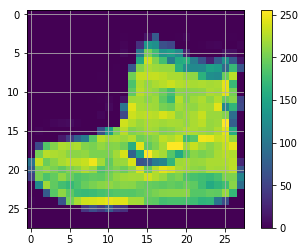

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid()

In [16]:
# 因为像素值在0-255之间，接下来将这些数据缩小至0-1之间

In [17]:
train_images = train_images / 255.0

In [18]:
test_images = test_images / 255.0

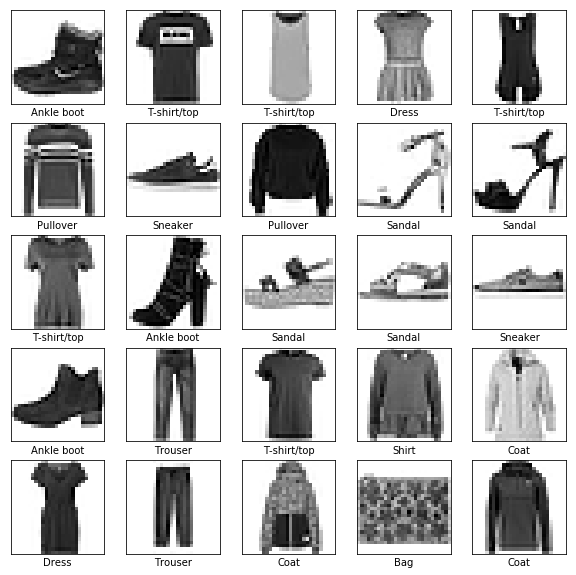

In [19]:
# 显示训练集前25张图片，并现实它的类别名称
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [20]:
# 构建模型
# 设置层
# 神经网络的基本构造块是层。层从馈送到其中的数据中提取表示结果。
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [21]:
model

In [22]:
# 该网络的第一层（tf.keras.layers.Flatten）将图片从二维数组的格式（[[28, 28],]）转为一维数组（[784,]）,可以将该层视为图像中像素未堆叠的行，并排列这些行。
# 该层没有要学习的参数；它只改动数据的格式。

In [23]:
# 在完成降维后，该网络还包含了两层（tf.keras.layers.Dense）
# 第一个 Dense 层具有 128 个节点（或神经元）。
# 第二个（也是最后一个）层是具有 10 个节点的 softmax 层，该层会返回一个具有 10 个概率得分的数组，这些得分的总和为 1。
# 每个节点包含一个得分，表示当前图像属于 10 个类别中某一个的概率。

In [24]:
# 编译模型
# 在完成模型的构建之后，还需要几个步骤才能开始训练
# 损失函数 - 衡量模型在训练期间的准确率。我们希望尽可能缩小该函数，以“引导”模型朝着正确的方向优化。
# 优化器 - 根据模型看到的数据及其损失函数更新模型的方式。
# 指标 - 用于监控训练和测试步骤。以下示例使用准确率，即图像被正确分类的比例。

In [25]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# 训练模型
# 训练神经网络模型需要执行以下步骤：
# 将训练数据馈送到模型中，比如 train_images 和 train_labels。
# 模型学习将图像与标签相关联。
# 模型对测试集进行预测，测试test_images与test_labels是否一致。

In [27]:
# 要开始训练，调用 model.fit 方法，使模型与训练数据“拟合”：
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.5027 - acc: 0.8239
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.3778 - acc: 0.8634
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3406 - acc: 0.8750
Epoch 4/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3132 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2949 - acc: 0.8911


In [28]:
# 评估准确率
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 26us/step


In [29]:
print('Test accuracy:', test_acc)
# 5 0.8734
# 10 0.8806
# 100 0.8859

Test accuracy: 0.8729


In [30]:
# 预测
predictions = model.predict(test_images)

In [31]:
predictions[0]

array([1.8729818e-06, 1.0363415e-06, 1.8768878e-07, 8.0445659e-08,
       5.4297147e-06, 8.2788533e-03, 1.3955330e-06, 6.6605315e-02,
       3.1365122e-05, 9.2507452e-01], dtype=float32)

In [32]:
# 预测结果由十个数字组成，这些数字说明了对应了十个分类的置信度。查看最高的置信度。
np.argmax(predictions[0])

9

In [33]:
# 因此可以十分确信这张图是属于class_name[9]，检查是否正确
test_labels[0]

9

In [34]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[
        i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(
        "{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100 * np.max(predictions_array),
                                  class_names[true_label]),
        color=color)

In [35]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

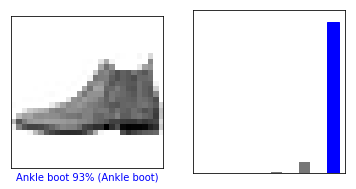

In [36]:
# 正确的预测标签为蓝色，错误的预测标签为红色。
# 数字表示预测标签的百分比（总计为 100）。
# 请注意，即使置信度非常高，也有可能预测错误。
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

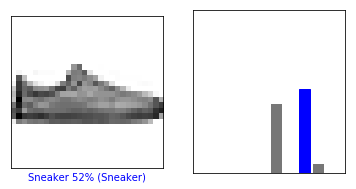

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

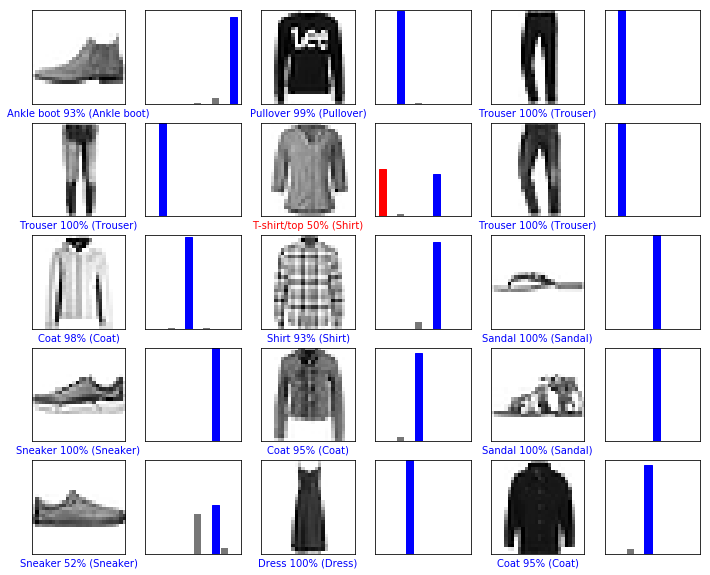

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [39]:
# 进行预测
img = test_images[0]

In [40]:
img.shape

(28, 28)

In [41]:
img = (np.expand_dims(img, 0))

In [42]:
img.shape

(1, 28, 28)

In [43]:
# 现在进行预测
predictions_single = model.predict(img)

In [44]:
predictions_single

array([[1.8729818e-06, 1.0363404e-06, 1.8768806e-07, 8.0445808e-08,
        5.4297093e-06, 8.2788533e-03, 1.3955330e-06, 6.6605277e-02,
        3.1365122e-05, 9.2507452e-01]], dtype=float32)

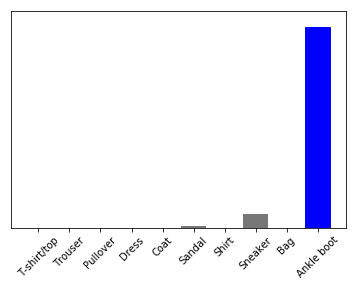

In [45]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [46]:
np.argmax(predictions_single[0])

9